In [1]:
# Import libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math
from matplotlib import pyplot

In [2]:
# Import data
df=pd.read_csv('lianjia_transformed.csv')
df.head()

,price,total_floor,area_size,elevator,date_on_market,last_transact_date,bedrm_no,parlour_no,kitchen_no,toilet_no,...,huangpu,jiading,jingan,jinshan,minhang,pudong,putuo,qingpu,songjiang,xuhui
0,27.5,0.619647,1.409916,1.114547,3.410232,0.461515,2.163063,1.083844,0.126653,1.510640,...,-0.111167,-0.277464,-0.27685,6.449612,-0.37391,-0.375540,-0.322588,-0.171167,-0.271031,-0.267648
1,90.0,-0.809379,0.916522,-0.909983,-0.629529,-0.851128,1.021290,1.083844,0.126653,1.510640,...,-0.111167,-0.277464,-0.27685,-0.155048,-0.37391,-0.375540,3.099934,-0.171167,-0.271031,-0.267648
2,22.3,-0.549556,-0.853521,-0.909983,-0.785086,-0.222380,-1.262256,-0.568443,0.126653,-0.433013,...,-0.111167,-0.277464,-0.27685,-0.155048,-0.37391,-0.375540,-0.322588,-0.171167,-0.271031,-0.267648
3,18.0,-0.159822,0.002453,1.114547,-0.860507,0.510394,-0.120483,-0.568443,-4.987205,-0.433013,...,-0.111167,-0.277464,-0.27685,-0.155048,-0.37391,2.662836,-0.322588,-0.171167,-0.271031,-0.267648
4,48.0,-0.679468,-0.197423,-0.909983,-0.714378,1.806743,-0.120483,-0.568443,0.126653,-0.433013,...,-0.111167,-0.277464,-0.27685,-0.155048,-0.37391,-0.375540,-0.322588,-0.171167,-0.271031,-0.267648


In [3]:
df['log_price'] = np.log(df['price'].values+1)
print(df[['price', 'log_price']].head())

   price  log_price
0   27.5   3.349904
1   90.0   4.510860
2   22.3   3.148453
3   18.0   2.944439
4   48.0   3.891820


In [4]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

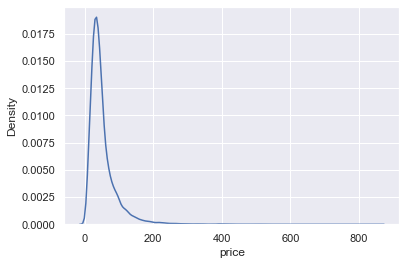

In [5]:
# Make default density plot
sns.kdeplot(df['price'])
plt.show()

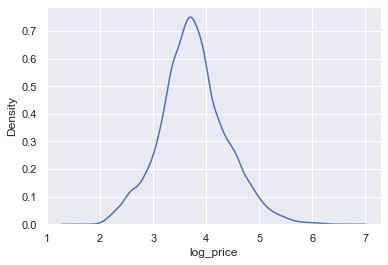

In [6]:
# Make default Boxplot
sns.kdeplot(df['log_price'])
plt.show()

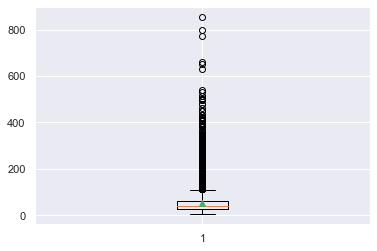

In [7]:
pyplot.boxplot(df['price'], showmeans=True)
pyplot.savefig("price.jpg")

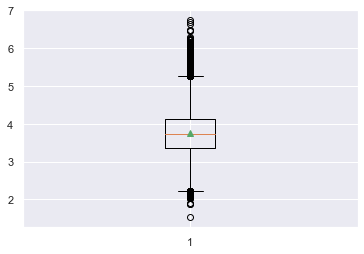

In [8]:
pyplot.boxplot(df['log_price'],showmeans=True)
pyplot.savefig("log_price1.jpg")

In [10]:
matrix = df.corr()
print(matrix)

                   price  total_floor  area_size  elevator  date_on_market  \
price           1.000000     0.296953   0.724013  0.246446        0.054075   
total_floor     0.296953     1.000000   0.188747  0.760842        0.080653   
area_size       0.724013     0.188747   1.000000  0.250581        0.117750   
elevator        0.246446     0.760842   0.250581  1.000000        0.108367   
date_on_market  0.054075     0.080653   0.117750  0.108367        1.000000   
...                  ...          ...        ...       ...             ...   
putuo           0.010618     0.040205  -0.048887 -0.034130       -0.022931   
qingpu         -0.048606     0.066359   0.046992  0.120166        0.001404   
songjiang      -0.041638     0.053355   0.099552  0.177348       -0.021325   
xuhui           0.054599    -0.030611  -0.096561 -0.087064       -0.005214   
log_price       0.864341     0.246123   0.593542  0.190678       -0.025893   

                last_transact_date  bedrm_no  parlour_no  kitch

In [15]:
matrix_pccs=np.corrcoef(df)
matrix_pccs

array([[1.        , 0.94799798, 0.92841621, ..., 0.74384824, 0.92458431,
        0.93249677],
       [0.94799798, 1.        , 0.97505789, ..., 0.78385689, 0.97377769,
        0.97772983],
       [0.92841621, 0.97505789, 1.        , ..., 0.7741983 , 0.95154028,
        0.97853965],
       ...,
       [0.74384824, 0.78385689, 0.7741983 , ..., 1.        , 0.77641304,
        0.77905481],
       [0.92458431, 0.97377769, 0.95154028, ..., 0.77641304, 1.        ,
        0.95384127],
       [0.93249677, 0.97772983, 0.97853965, ..., 0.77905481, 0.95384127,
        1.        ]])

In [22]:
df_corr=df.corr(method='pearson')
df_corr

,price,total_floor,area_size,elevator,date_on_market,last_transact_date,bedrm_no,parlour_no,kitchen_no,toilet_no,...,jiading,jingan,jinshan,minhang,pudong,putuo,qingpu,songjiang,xuhui,log_price
price,1.000000,0.296953,0.724013,0.246446,0.054075,0.096540,0.522783,0.412715,0.090799,0.577803,...,-0.146681,0.126809,-0.118984,0.063584,0.049688,0.010618,-0.048606,-0.041638,0.054599,0.864341
total_floor,0.296953,1.000000,0.188747,0.760842,0.080653,-0.109313,0.070868,0.176337,-0.023989,0.111992,...,0.041842,0.121509,-0.030597,-0.105817,-0.036041,0.040205,0.066359,0.053355,-0.030611,0.246123
area_size,0.724013,0.188747,1.000000,0.250581,0.117750,0.037476,0.758424,0.605031,0.124022,0.730022,...,-0.033659,-0.019928,0.046061,0.048030,0.059886,-0.048887,0.046992,0.099552,-0.096561,0.593542
elevator,0.246446,0.760842,0.250581,1.000000,0.108367,-0.165206,0.135151,0.276862,-0.017623,0.163617,...,0.091477,0.016236,-0.029154,-0.047182,-0.027079,-0.034130,0.120166,0.177348,-0.087064,0.190678
date_on_market,0.054075,0.080653,0.117750,0.108367,1.000000,0.013031,0.060426,0.044847,-0.021651,0.093788,...,0.029146,0.011021,0.076401,-0.070286,0.008431,-0.022931,0.001404,-0.021325,-0.005214,-0.025893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
putuo,0.010618,0.040205,-0.048887,-0.034130,-0.022931,0.043205,-0.072769,-0.078471,-0.015872,-0.012538,...,-0.088416,-0.088037,-0.049964,-0.118996,-0.118891,1.000000,-0.055264,-0.087594,-0.086415,0.028837
qingpu,-0.048606,0.066359,0.046992,0.120166,0.001404,-0.103538,0.043429,0.052180,0.021275,0.039776,...,-0.047728,-0.047524,-0.026971,-0.064236,-0.064180,-0.055264,1.000000,-0.047285,-0.046649,-0.059687
songjiang,-0.041638,0.053355,0.099552,0.177348,-0.021325,-0.070817,0.095084,0.119407,0.015190,0.069005,...,-0.075650,-0.075326,-0.042750,-0.101815,-0.101725,-0.087594,-0.047285,1.000000,-0.073938,-0.040137
xuhui,0.054599,-0.030611,-0.096561,-0.087064,-0.005214,0.040137,-0.100496,-0.138431,-0.020166,-0.076743,...,-0.074632,-0.074312,-0.042174,-0.100445,-0.100356,-0.086415,-0.046649,-0.073938,1.000000,0.107077


In [23]:
df_corr.to_csv('df_corr.csv')